In [1]:
from src.baseline import Baseline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os; os.chdir('..')


# Results

## Forecast

The below code produces an illustration of a forecast including confidence intervals. Try different changing the time to investigate more forecasts.
NB: You need to add the data to the `data/`folder to do so.

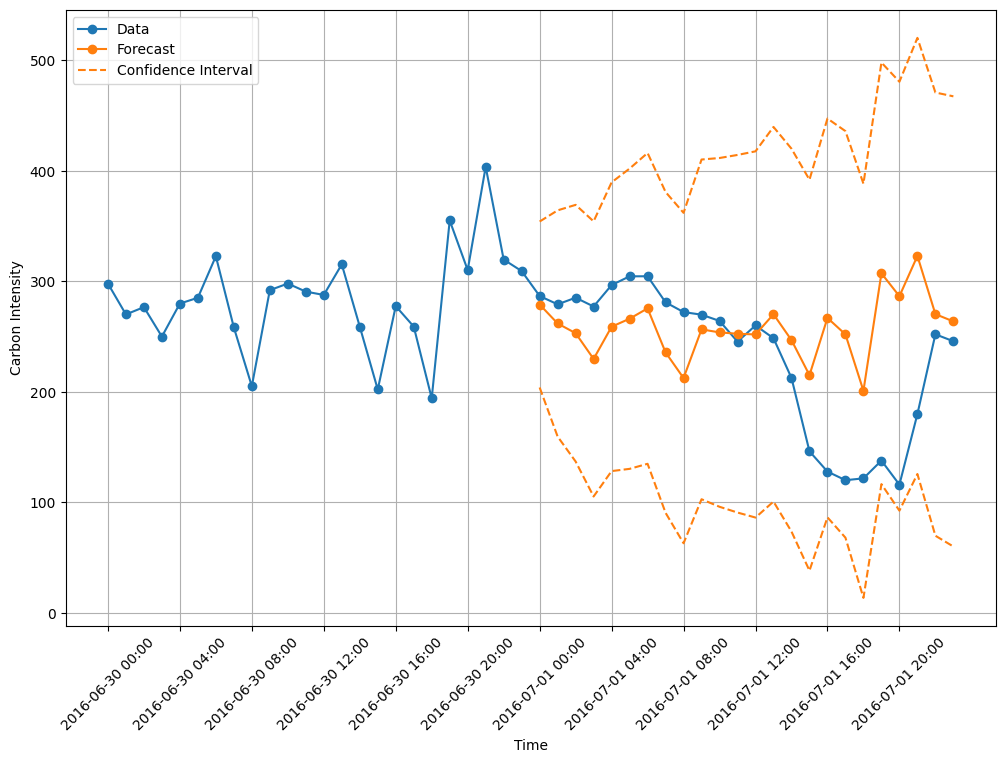

In [19]:
def forecast_plot(time):
    model = Baseline()

    time2 = pd.to_datetime(time) + pd.Timedelta('1 days')
    data = model.fetch_data(str(time2), n_days = 2)
    forecast = model.get_forecast(time)

    fig, ax = plt.subplots(1,1,figsize=(12,8))

    ax.plot(range(0,48),data, marker='o', label='Data')

    ax.plot(range(24,48),forecast['mean'].values, color='C1', label='Forecast', marker='o')

    ax.plot(range(24,48),forecast['lower'].values, color='C1', linestyle='--', label='Confidence Interval')
    ax.plot(range(24,48),forecast['upper'].values, color='C1', linestyle='--')


    ticks = pd.to_datetime(data.index).strftime('%Y-%m-%d %H:00')
    ax.set_xticks(range(0,48,4))
    ax.set_xticklabels(ticks[::4], rotation=45)
    ax.set_xlabel('Time')
    ax.set_ylabel('Carbon Intensity')
    ax.legend()
    ax.grid()

forecast_plot('2016-07-01')

## Performance

The cell below tests the model on a set of forecasts. NB: It takes some time to run it!

In [ ]:

def test_baseline(time, n_days = 21, T = 200):
    model = Baseline()

    y = []
    yp = []
    for i in tqdm(range(T)):
        time2 = pd.to_datetime(time) + pd.Timedelta('1 days')
        data = model.fetch_data(str(time2), n_days = 1)
        forecast = model.get_forecast(time, n_days)

        time = str(pd.to_datetime(time) + pd.Timedelta('1 days'))

        y.append(data)
        yp.append(forecast['mean'])

    return y, yp

y, yp = test_baseline('2019-01-01')


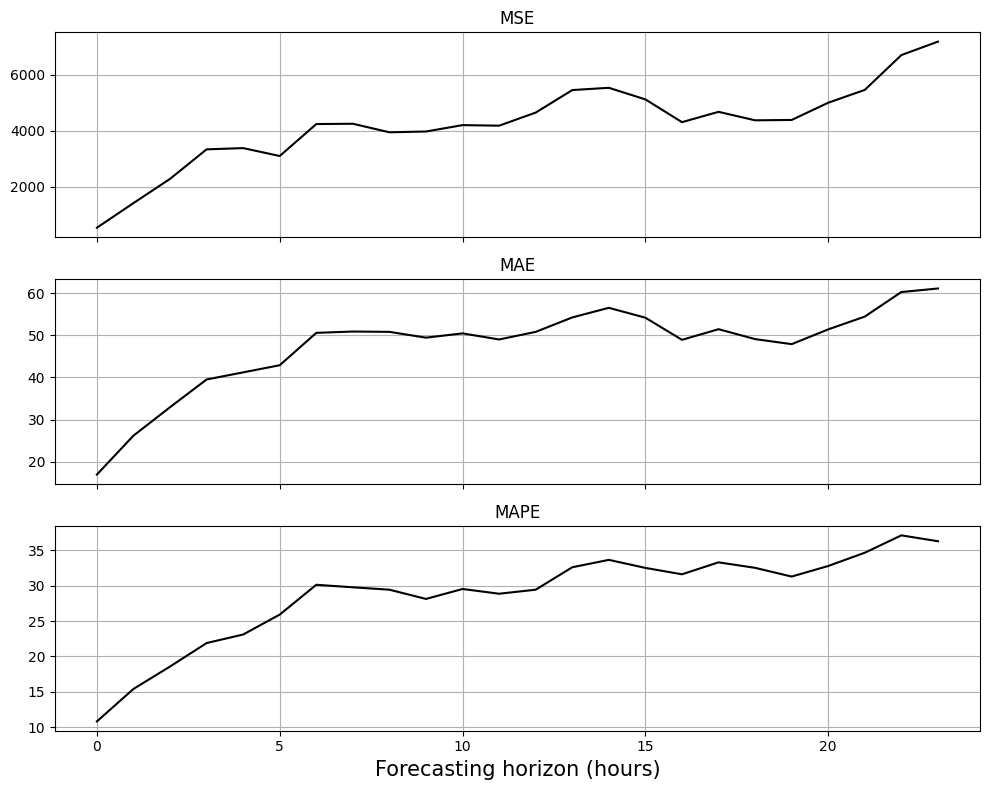

In [32]:
y, yp = np.array(y), np.array(yp)
E = np.array(yp-y)
fig, ax = plt.subplots(3, 1, figsize = (10, 8), sharex = True)
# mse
ax[0].plot(np.nanmean(E**2, axis = 0), color = 'black')
ax[0].set_title('MSE')
ax[0].grid()

# mae
ax[1].plot(np.nanmean(abs(E), axis = 0), color = 'black')
ax[1].set_title('MAE')
ax[1].grid()

# mape
ax[2].plot(np.nanmean(abs(E)/y, axis = 0)*100, color = 'black')
ax[2].set_title('MAPE')
ax[2].grid()

ax[2].set_xlabel('Forecasting horizon (hours)', fontsize = 15)

fig.tight_layout()

In [29]:
np.nanmean(E**2, axis = 0)

array([ 538.32481412, 1415.581051  , 2279.05439909, 3331.81344513,
       3375.92782812, 3094.20780553, 4233.71693343, 4244.3660782 ,
       3939.52362871, 3968.04831484, 4195.27068248, 4175.88980316,
       4642.62261918, 5445.53015919, 5526.03082398, 5112.19122139,
       4301.22894856, 4669.13170225, 4366.77006595, 4379.53549998,
       4994.66227484, 5451.95105231, 6693.11586111, 7172.03590448])

In [31]:
np.nanmean(abs(E), axis = 0)

array([16.90676631, 26.16266356, 32.91945713, 39.52394671, 41.21264538,
       42.91223976, 50.61414172, 50.92619636, 50.84859995, 49.47224145,
       50.48653488, 49.04193054, 50.84681401, 54.28334492, 56.56682849,
       54.21713629, 48.94772556, 51.48249077, 49.12529881, 47.92485997,
       51.43987217, 54.48633975, 60.32307664, 61.16305267])

In [30]:
np.nanmean(abs(E)/y, axis = 0)

array([0.1080979 , 0.15401624, 0.18567919, 0.21888354, 0.23095403,
       0.25911393, 0.30126633, 0.29768302, 0.29429891, 0.28124884,
       0.29530456, 0.28860385, 0.29430628, 0.32603965, 0.33648386,
       0.32510696, 0.31607732, 0.33297262, 0.32520024, 0.31288213,
       0.32783449, 0.346589  , 0.37112532, 0.36280671])